In [ ]:
# Metoda Monte Carlo dla równania Laplace'a

Warunek brzegowy Dirichleta - polega na założeniu, że funkcja będąca rozwiązaniem danego problemu musi przyjmować określone, z góry zadane wartości na brzegu dziedziny.

W kodzie poniżej wizualizujemy pewną funkcję dla L-kształtnej figury

In [25]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import scipy
%matplotlib inline
plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(11.7,8.27)})
L = 20 # szerokosc/wysokosc naszego ksztaltu

In [26]:
def move(pos, discrete_step):
    # losowe bladzenie
    x,y = pos
    axis = random.choice([0,1])
    
    if ( axis == 0 ):
        x += discrete_step*random.choice([-1,1])
    if ( axis == 1):
        y += discrete_step*random.choice([-1,1])
    return (x, y)

def check_rules(pos, L_range):
    # sprawdzenie zakonczenia symulacji
    x,y = pos
    
    if x < L_range[0] or x > L_range[1]:
        return 0
    if y < L_range[0] or y > L_range[1]:
        return 0
    
    if x >= int(L_range[1]/2) and y >= int(L_range[1]/2):
        return 2
    
    if x <= L_range[0] or x >= L_range[1] or y <= L_range[0] or y >= L_range[1]:
        return 2
    
    return 1

def single_experiment(position=None, max_steps=50, discrete_step=1):
    # przeprowadzenie bladzenia pojedynczego punku az do wyjscia
    L_range=(0,L)
    if not position or len(position) != 2:
        position = [np.random.uniform(x_range[0], x_range[1]), np.random.uniform(y_range[0], y_range[1])]
    
    position_tracker = [position]
    
    for step in range(max_steps):
        position = move(position, discrete_step)
        position_tracker.append(position)
        survives = check_rules(position, L_range)
        if survives == 0 or survives == 2:
            break
    
    return position_tracker, position, survives

In [27]:
# pomocnicze funkcje do rysowania wykresu ksztaltu oraz sciezek

def init_plot():
    plt.figure(dpi=450)
    plt.plot([0,0,L/2,L/2,L,L,0],[0,L,L,L/2,L/2,0,0],'k--')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis('equal')
    
def draw_path(walk_path):
    x, y = zip(*walk_path)
    plt.plot(x, y)
    plt.scatter(x[-1], y[-1],marker='x',c='r', s=200);

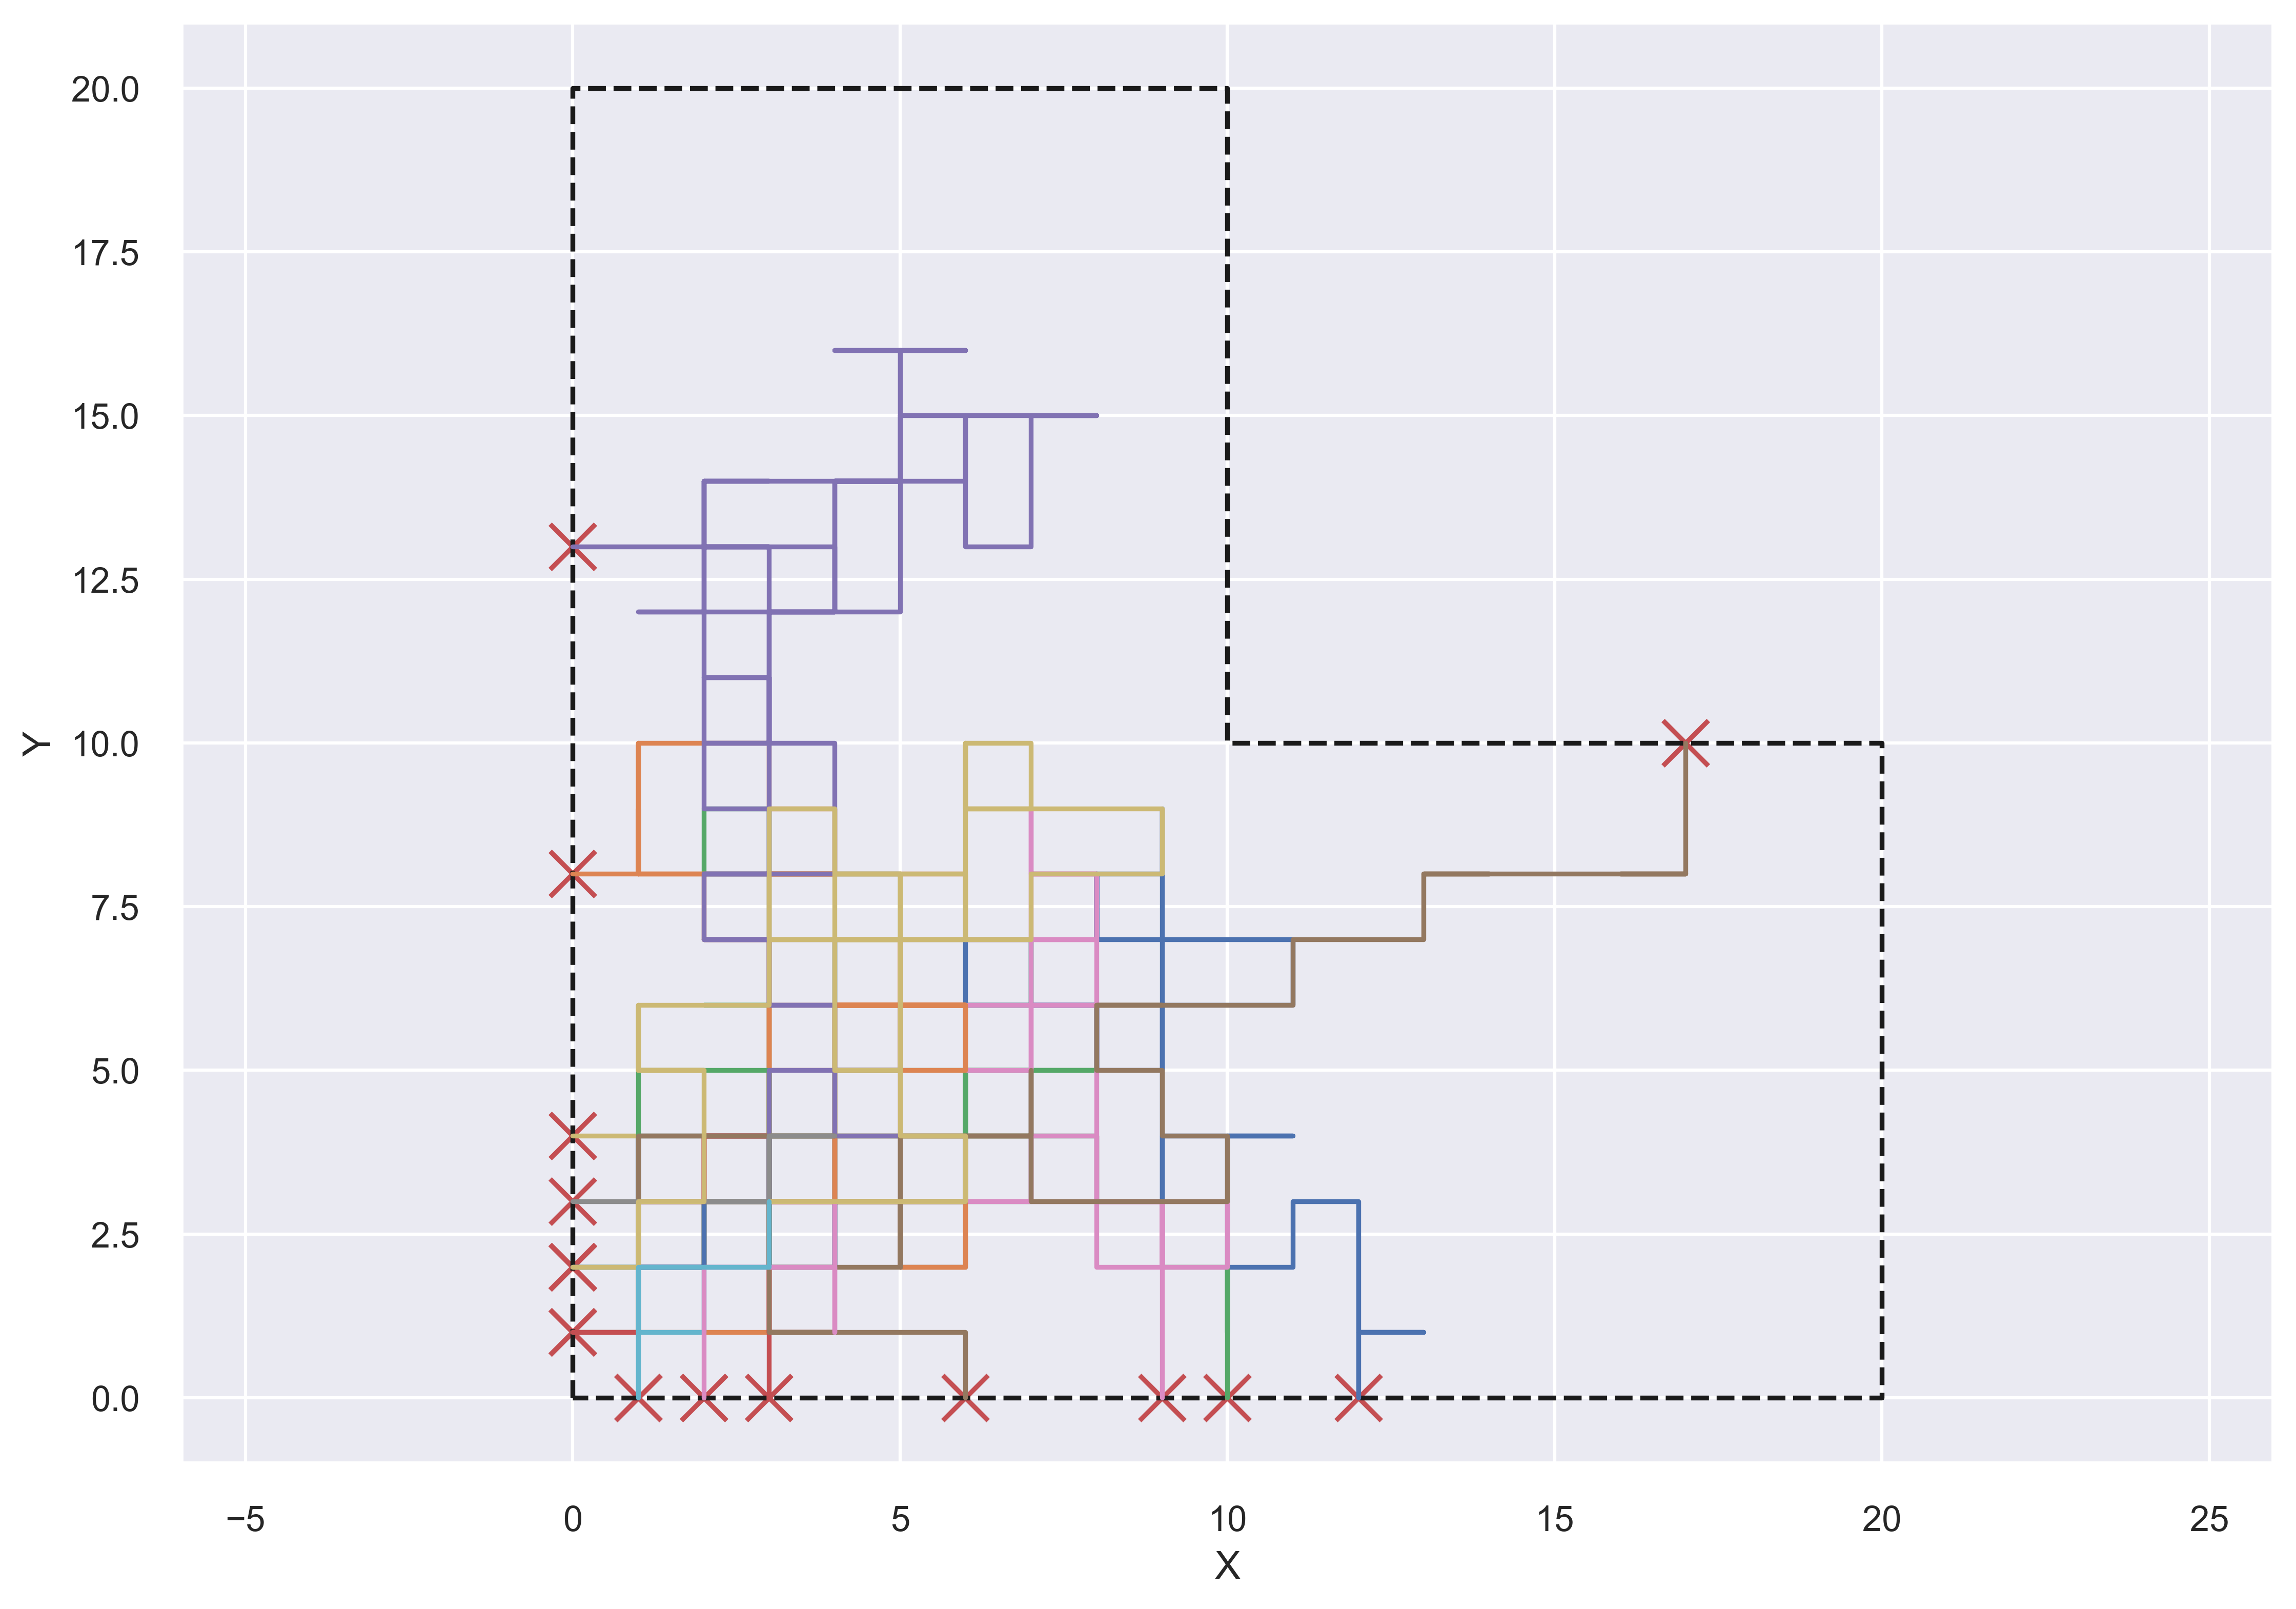

In [28]:
# testowe bladzenie dla punktu (3,3) 20 razy
number_of_walkers = 20
start_node = (3,3)
paths = []
results = {} 
# wyniki przedstawmy w macierzy
results = np.zeros((L+1,L+1), dtype=np.double)

for walker in range(number_of_walkers):
    walk_path, final_pos, result = single_experiment(position=start_node, max_steps=1000)
    if result == 2:
        paths.append(walk_path)
        results[final_pos[1]][final_pos[0]] += 1
        
        
init_plot()
for w in paths:
    draw_path(w)

In [29]:
def u(s):
    # zalozenie - funkcja dla ktorej obliczamy wyniki
    return 3 * s * abs(math.sin(s))

def s(x,y):
    s = 0
    if y == 0 and x < L:
        s = 1
    if y < L/2 and x == L:
        s = 2
    if y == L//2 and L//2 < x < L:
        s = 3
    if x == L//2 and L//2 < y < L:
        s =  4
    if y == L and 0 < x < L//2:
        s =  5
    if x == 0 and y < L:
        s =  6
    return 4 * s - 5

def u_ij(i, j, L):
    # obliczanie wyniku dla punktu u_ij ze statystyki
    number_of_walks = 100
    start_node = (i,j)
    paths = []
    results = {} 
    # wyniki przedstawmy w macierzy
    results = np.zeros((L+1,L+1), dtype=np.double)

    for walker in range(number_of_walks):
        walk_path, final_pos, result = single_experiment(position=start_node, max_steps=1000)
        if result == 2:
            paths.append(walk_path)
            results[final_pos[1]][final_pos[0]] += 1
    liczba_wynikow = np.count_nonzero(results)

    u_ij = 0
    for x,y in np.argwhere(results != 0):
          u_ij += results[x][y]/liczba_wynikow * u(s(x,y))
       
  
            
    return u_ij

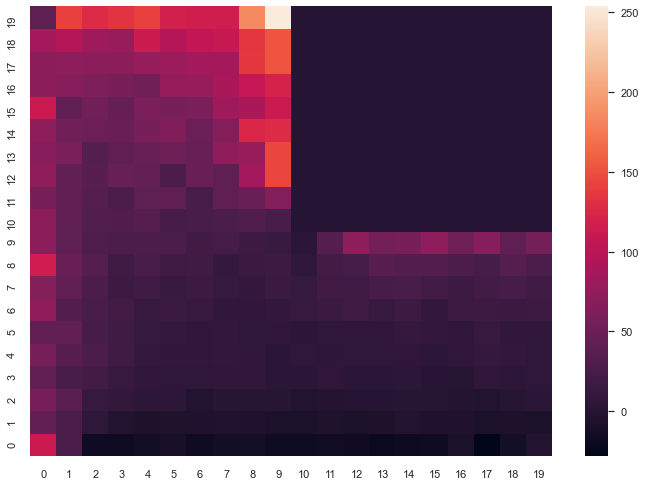

In [30]:
grid = np.zeros((L,L), dtype=np.double)

# liczymy dla punktow wewnatrz L-ksztaltnego obszaru omega
for i in range(0,L):
    for j in range(0,L): 
        grid[i][j] = u_ij(i,j, L)

for i in range(int(L/2), L):
    for j in range(int(L/2), L):
        grid[i][j] = 0

ax = sns.heatmap(grid)
ax.invert_yaxis()
plt.show()

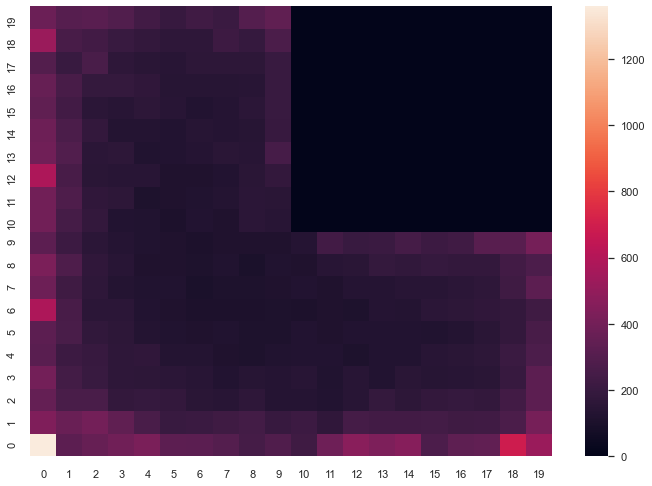

In [31]:
def u(x,y):
    # zalozenie - funkcja dla ktorej obliczamy wyniki, zalezna od polozenia (x,y)
    return 40 + abs(L//2 - x)

def u_ij(i, j, L):
    # obliczanie wyniku dla punktu u_ij ze statystyki
    number_of_walkers = 100
    start_node = (i,j)
    paths = []
    results = {} 
    # wyniki przedstawmy w macierzy
    results = np.zeros((L+1,L+1), dtype=np.double)

    # szybkie wyjscie
    if i in range(L//2, L) and j in range(L//2, L):
        return 0

    for walker in range(number_of_walkers):
        walk_path, final_pos, result = single_experiment(position=start_node, max_steps=100)
        if result == 2:
            paths.append(walk_path)
            results[final_pos[1]][final_pos[0]] += 1
    liczba_wynikow = np.count_nonzero(results)

    u_ij = 0
    for coord in np.argwhere(results != 0):
        u_ij += results[coord[0]][coord[1]]/liczba_wynikow * u(coord[0], coord[1])
  
            
    return u_ij

grid = np.zeros((L,L), dtype=np.double)

# liczymy dla punktow wewnatrz L-ksztaltnego obszaru omega
for i in range(0,L):
    for j in range(0,L): 
        grid[i][j] = u_ij(i,j,L)


ax = sns.heatmap(grid)
ax.invert_yaxis()
plt.show()

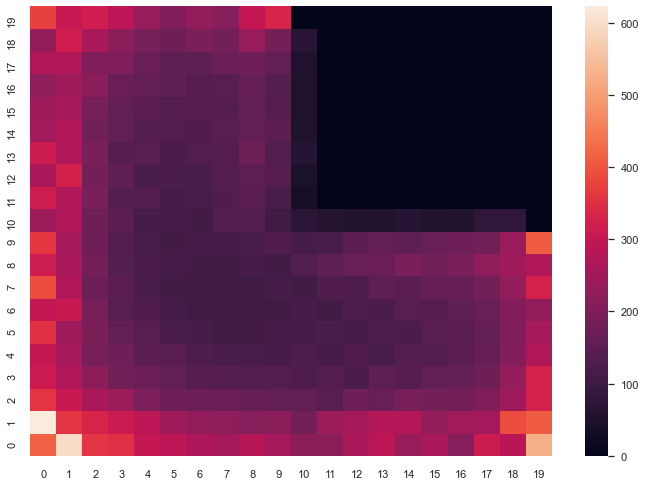

In [32]:
koncowy_rozklad = np.zeros((L,L), dtype=np.double)

for i in range(0,L):
    for j in range(0,L): 
        try:
          koncowy_rozklad[i][j] = ( grid[i-1][j] + grid[i+1][j] + grid[i][j-1] + grid[i][j+1] )/4
        except Exception as e:
          koncowy_rozklad[i][j] = grid[i][j]


ax = sns.heatmap(koncowy_rozklad)
ax.invert_yaxis()
plt.show()